### Complete EDA

In [1]:
import sys
import logging
import math

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import statsmodels.tsa.api as tsa

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

%matplotlib inline

matplotlib.style.use("Solarize_Light2")

sys.path.insert(0, "/opt/vssexclude/personal/kaggle/k_tab_aug_22")

In [2]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [3]:
import src.config.constants as constants
import src.munging as process_data
import src.viz as viz
import src.common as common

In [4]:
logger = common.get_logger("eda")

In [6]:
train_df, test_df, submission_df = process_data.read_raw_data(logger, data_dir=constants.RAW_DATA_DIR, index_col_name="id")

[INFO]2022-08-01 11:07:07,361:eda:Reading Data from /opt/vssexclude/personal/kaggle/k_tab_aug_22/data/raw...
[INFO]2022-08-01 11:07:07,466:eda:Shape of train_df : (26570, 25)
[INFO]2022-08-01 11:07:07,528:eda:Shape of test_df : (20775, 24)
[INFO]2022-08-01 11:07:07,535:eda:Shape of sample_submission_df : (20775, 1)


In [7]:
train_df.shape, test_df.shape, submission_df.shape

((26570, 25), (20775, 24), (20775, 1))

In [8]:
train_df.head()

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                           
0             A    80.10  material_7  material_8            9            5   
1             A    84.89  material_7  material_8            9            5   
2             A    82.43  material_7  material_8            9            5   
3             A   101.07  material_7  material_8            9            5   
4             A   188.06  material_7  material_8            9            5   

    measurement_0  measurement_1  measurement_2  measurement_3  measurement_4  \
id                                                                              
0               7              8              4         18.040         12.518   
1              14              3              3         18.213         11.540   
2              12              1              5         18.057         11.652   
3              13              2              6         17.295         11.188   
4               9              2              8         19.346         12.950   

    measurement_5  measurement_6  measurement_7  measurement_8  measurement_9  \
id                                                                              
0          15.748         19.292         11.739         20.155         10.672   
1          17.717         17.893         12.748         17.889         12.448   
2          16.738         18.240         12.718         18.288         12.715   
3          18.576         18.339         12.583         19.060         12.471   
4          16.990         15.746         11.306         18.093         10.337   

    measurement_10  measurement_11  measurement_12  measurement_13  \
id                                                                   
0           15.859          17.594          15.193          15.029   
1           17.947          17.915          11.755          14.732   
2           15.607             NaN          13.798          16.711   
3           16.346          18.377          10.020          15.250   
4           17.082          19.932          12.428          16.182   

    measurement_14  measurement_15  measurement_16  measurement_17  failure  
id                                                                           
0              NaN          13.034          14.684         764.100        0  
1           15.425          14.395          15.631         682.057        0  
2           18.631          14.094          17.946         663.376        0  
3           15.562          16.154          17.172         826.282        0  
4           12.760          13.153          16.412         579.885        0

In [10]:
test_df.head()

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                              
26570            F   119.57  material_5  material_6            6            4   
26571            F   113.51  material_5  material_6            6            4   
26572            F   112.16  material_5  material_6            6            4   
26573            F   112.72  material_5  material_6            6            4   
26574            F   208.00  material_5  material_6            6            4   

       measurement_0  measurement_1  measurement_2  measurement_3  \
id                                                                  
26570              6              9              6         19.305   
26571             11              8              0         17.883   
26572              8             12              4         18.475   
26573              8             11             10         16.518   
26574             14             16              8         17.808   

       measurement_4  measurement_5  measurement_6  measurement_7  \
id                                                                  
26570         10.178         17.534         18.168         11.598   
26571         11.927         17.228         16.033         11.179   
26572         10.481         16.619         18.189         12.126   
26573         10.888         15.293         18.592         11.304   
26574         12.693         17.678         15.814         13.431   

       measurement_8  measurement_9  measurement_10  measurement_11  \
id                                                                    
26570         18.654         10.802          15.909          18.070   
26571         19.368         12.032          13.998             NaN   
26572         17.774         11.743          17.046          18.086   
26573         18.948         11.790          18.165          16.163   
26574         19.141         12.370          14.578          17.849   

       measurement_12  measurement_13  measurement_14  measurement_15  \
id                                                                      
26570          13.772          13.659          16.825          13.742   
26571          12.473          17.468          16.708          14.776   
26572          10.907          13.363          15.737          17.065   
26573          10.933          15.501          15.667          12.620   
26574          11.941          16.070          16.183          13.324   

       measurement_16  measurement_17  
id                                     
26570          17.710         634.612  
26571          14.102         537.037  
26572          16.021         658.995  
26573          16.111         594.301  
26574          17.150         801.044

In [11]:
submission_df.head()

failure
id            
26570      0.0
26571      0.0
26572      0.0
26573      0.0
26574      0.0

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

In [14]:
TARGET = "failure"
INDEX = "id"

combined_df = pd.concat([train_df.drop(TARGET, axis=1), test_df])
combined_df.shape

combined_df.describe(include="all").T

count unique         top   freq        mean         std  \
product_code      47345      9           C   5765         NaN         NaN   
loading         46872.0    NaN         NaN    NaN  127.742337   39.084410   
attribute_0       47345      2  material_7  31566         NaN         NaN   
attribute_1       47345      4  material_6  15872         NaN         NaN   
attribute_2     47345.0    NaN         NaN    NaN    7.184032    1.484426   
attribute_3     47345.0    NaN         NaN    NaN    6.782511    1.752717   
measurement_0   47345.0    NaN         NaN    NaN    7.432422    4.186657   
measurement_1   47345.0    NaN         NaN    NaN    8.552793    4.274405   
measurement_2   47345.0    NaN         NaN    NaN    6.199683    3.550439   
measurement_3   46635.0    NaN         NaN    NaN   17.792378    1.001631   
measurement_4   46398.0    NaN         NaN    NaN   11.729944    1.000809   
measurement_5   46161.0    NaN         NaN    NaN   17.132315    1.001835   
measurement_6   45925.0    NaN         NaN    NaN   17.512970    0.997767   
measurement_7   45688.0    NaN         NaN    NaN   11.714120    1.000943   
measurement_8   45451.0    NaN         NaN    NaN   19.027367    1.007187   
measurement_9   45214.0    NaN         NaN    NaN   11.425098    0.999505   
measurement_10  44978.0    NaN         NaN    NaN   16.120460    1.477943   
measurement_11  44741.0    NaN         NaN    NaN   19.029202    1.559309   
measurement_12  44504.0    NaN         NaN    NaN   11.795419    1.438893   
measurement_13  44268.0    NaN         NaN    NaN   15.689501    1.248694   
measurement_14  44031.0    NaN         NaN    NaN   16.081604    1.457224   
measurement_15  43794.0    NaN         NaN    NaN   15.048413    1.548537   
measurement_16  43557.0    NaN         NaN    NaN   16.537596    1.682775   
measurement_17  43321.0    NaN         NaN    NaN  701.322119  126.381679   

                   min       25%      50%        75%       max  
product_code       NaN       NaN      NaN        NaN       NaN  
loading         33.160   99.7775  122.260  149.01000   385.860  
attribute_0        NaN       NaN      NaN        NaN       NaN  
attribute_1        NaN       NaN      NaN        NaN       NaN  
attribute_2      5.000    6.0000    7.000    9.00000     9.000  
attribute_3      4.000    5.0000    7.000    8.00000     9.000  
measurement_0    0.000    4.0000    7.000   10.00000    30.000  
measurement_1    0.000    5.0000    8.000   11.00000    33.000  
measurement_2    0.000    4.0000    6.000    8.00000    28.000  
measurement_3   13.565   17.1170   17.788   18.47400    21.499  
measurement_4    7.384   11.0500   11.731   12.41100    16.484  
measurement_5   12.073   16.4500   17.132   17.81300    21.681  
measurement_6   12.715   16.8430   17.514   18.18600    21.543  
measurement_7    7.853   11.0410   11.708   12.38800    15.828  
measurement_8   14.885   18.3460   19.029   19.70800    23.807  
measurement_9    7.537   10.7530   11.423   12.09800    15.412  
measurement_10   9.167   15.1640   16.118   17.08175    23.354  
measurement_11  12.461   17.9580   19.053   20.10700    25.640  
measurement_12   5.167   10.8610   11.821   12.75100    18.962  
measurement_13   9.209   14.8840   15.672   16.46700    22.713  
measurement_14   8.415   15.1370   16.081   17.04800    23.140  
measurement_15   8.417   14.0080   15.010   16.05600    22.097  
measurement_16   9.701   15.3710   16.558   17.69800    24.094  
measurement_17   1.671  618.9050  701.220  784.37300  1312.794

In [15]:
features = train_df.drop([TARGET], axis=1).columns
len(features)

24

In [16]:
tables = [train_df, test_df]
table_names = ['train', 'test']
for name, table in zip(table_names, tables):
    print(f'============={name}==============')
    print(f'Checking Null')
    print(process_data.check_null(table))
    print(f'Checking Duplicate')
    print(process_data.check_duplicate(table, subset=features))

=============train==============
Checking Null
product_code      0.000000
loading           0.940911
attribute_0       0.000000
attribute_1       0.000000
attribute_2       0.000000
attribute_3       0.000000
measurement_0     0.000000
measurement_1     0.000000
measurement_2     0.000000
measurement_3     1.433948
measurement_4     2.024840
measurement_5     2.544223
measurement_6     2.995860
measurement_7     3.526534
measurement_8     3.944298
measurement_9     4.617990
measurement_10    4.892736
measurement_11    5.525028
measurement_12    6.025593
measurement_13    6.676703
measurement_14    7.053067
measurement_15    7.561159
measurement_16    7.941287
measurement_17    8.596161
failure           0.000000
dtype: float64
Checking Duplicate
0
=============test==============
Checking Null
product_code      0.000000
loading           1.073406
attribute_0       0.000000
attribute_1       0.000000
attribute_2       0.000000
attribute_3       0.000000
measurement_0     0.000000
measure

### Plot Null

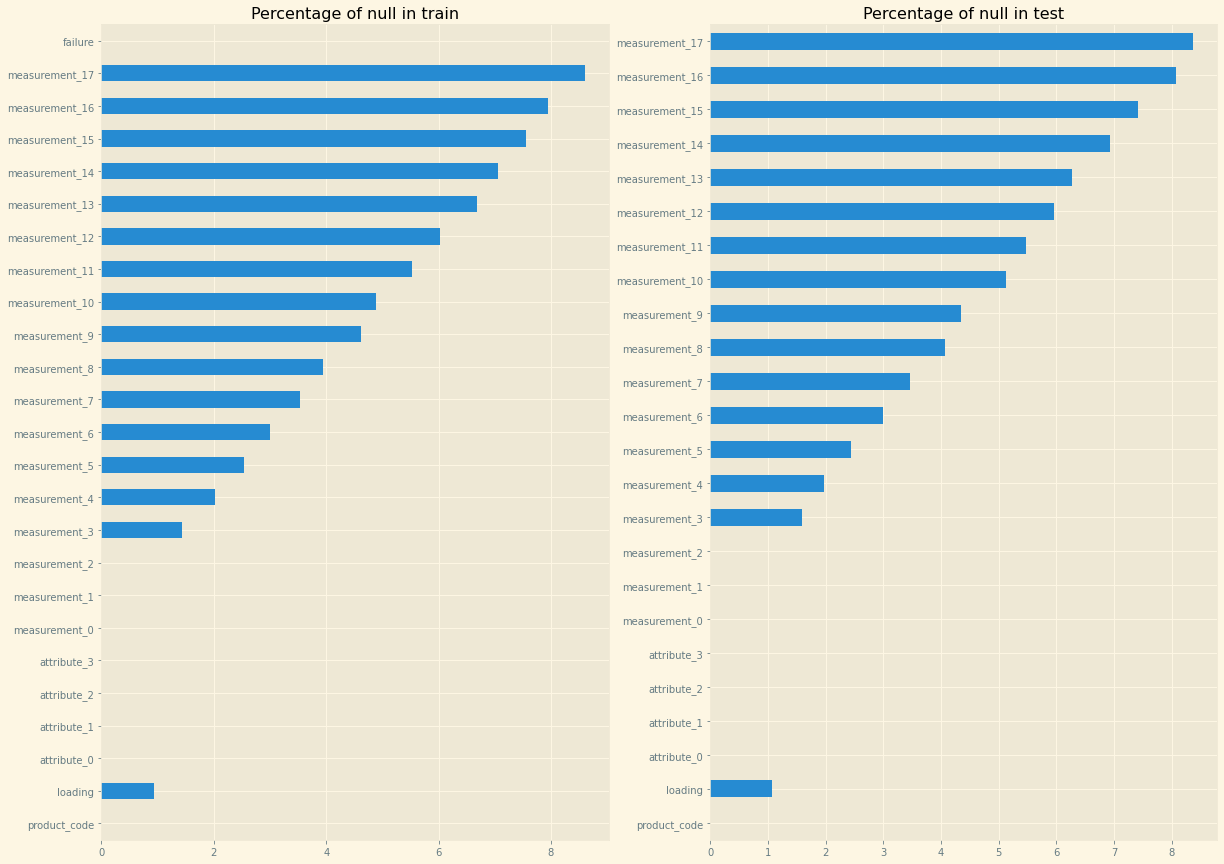

In [17]:
viz.plot_null_percentage_train_test_side_by_side(train_df, test_df, figsize=(20, 15))

### Check id column

Is the index monotonic : True


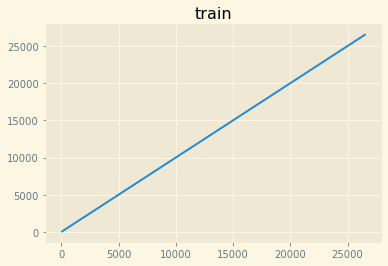

Is the index monotonic : True


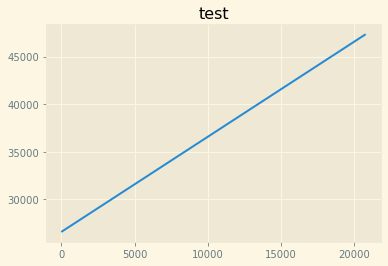

In [18]:
# Check if the id is continous or not.
for table_name, table in zip(table_names, tables):
    process_data.check_index(table, data_set_name=table_name)

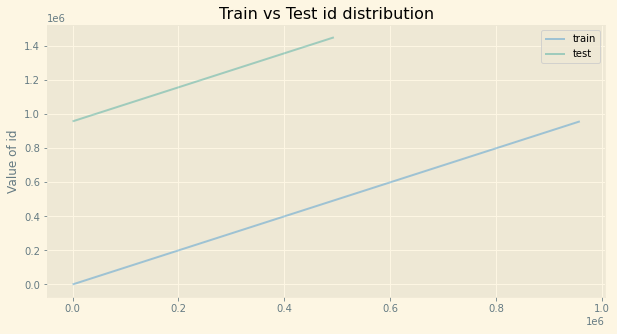

In [18]:
# Check if the id is continous or not.
viz.plot_line_train_test_overlapping(train_df.reset_index(), test_df.reset_index(), 'id')

### Check the target column

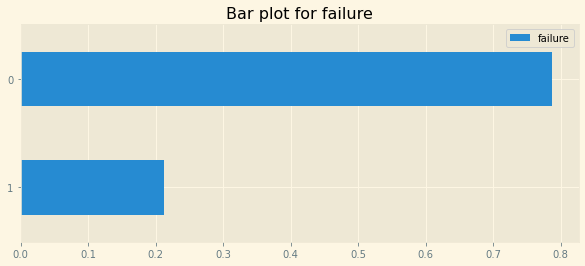

In [19]:
viz.plot_barh(df=train_df, feature_name=TARGET, figsize=(10, 4), sort_index=True)

In [20]:
df = pd.DataFrame({"counts": train_df[TARGET].value_counts(), "percentage": train_df[TARGET].value_counts(normalize=True).mul(100)})
df = df.reset_index()
df.columns = ["failure_value", "failure_counts", "failure_percentage"]
df

failure_value  failure_counts  failure_percentage
0              0           20921            78.73918
1              1            5649            21.26082

#### What is the average value of the target "failure"?

In [21]:
train_df[TARGET].mean()

0.21260820474219044

### Unique values of each feature (To identify the categorical features)

In [22]:
unique_count_df = pd.DataFrame({"name" : combined_df.columns, "nunique": combined_df.nunique(), "dtype": combined_df.dtypes}, )
unique_count_df["fraction"] = (unique_count_df["nunique"] / len(combined_df)).mul(100)
unique_count_df = unique_count_df.sort_values(by="fraction")
unique_count_df = unique_count_df.reset_index(drop=True)
unique_count_df.head(30)

name  nunique    dtype   fraction
0      attribute_0        2   object   0.004224
1      attribute_1        4   object   0.008449
2      attribute_2        5    int64   0.010561
3      attribute_3        6    int64   0.012673
4     product_code        9   object   0.019009
5    measurement_2       28    int64   0.059140
6    measurement_0       31    int64   0.065477
7    measurement_1       33    int64   0.069701
8    measurement_4     5185  float64  10.951526
9    measurement_8     5188  float64  10.957862
10   measurement_9     5189  float64  10.959975
11   measurement_3     5190  float64  10.962087
12   measurement_6     5198  float64  10.978984
13   measurement_5     5199  float64  10.981096
14   measurement_7     5207  float64  10.997993
15  measurement_13     6393  float64  13.503010
16  measurement_12     7105  float64  15.006865
17  measurement_14     7198  float64  15.203295
18  measurement_10     7291  float64  15.399725
19  measurement_15     7452  float64  15.739782
20  measurement_11     7454  float64  15.744007
21  measurement_16     7874  float64  16.631112
22         loading    14652  float64  30.947302
23  measurement_17    41261  float64  87.149646

## Histogram of all the features

In [26]:
num_features = ['loading', 'attribute_2',
       'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6',
       'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17']

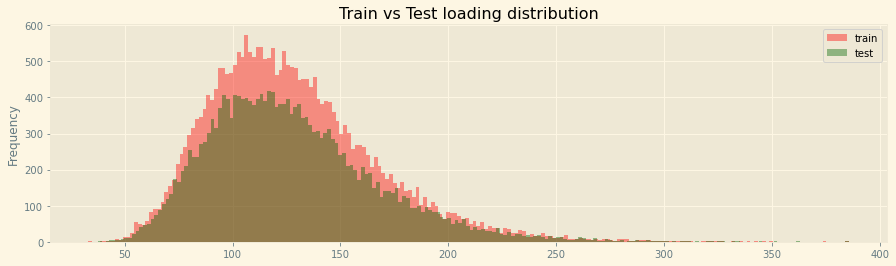

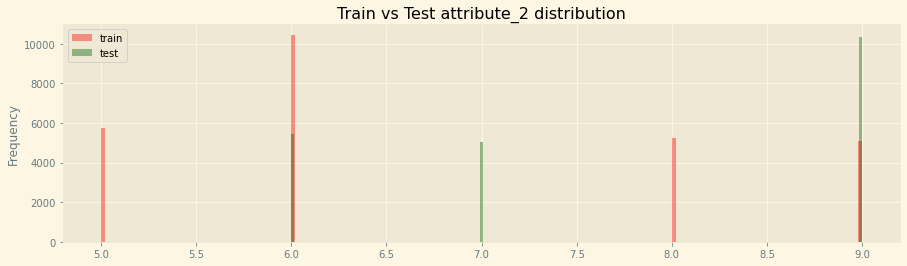

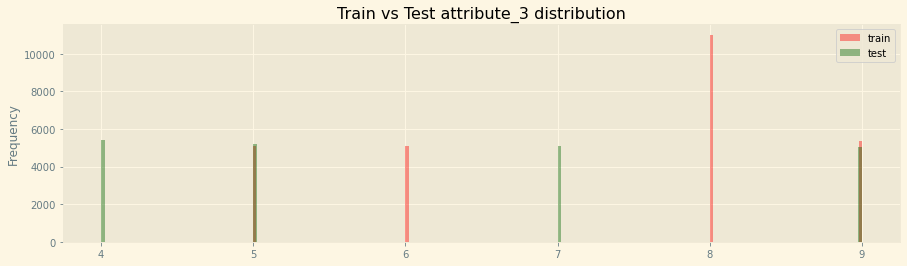

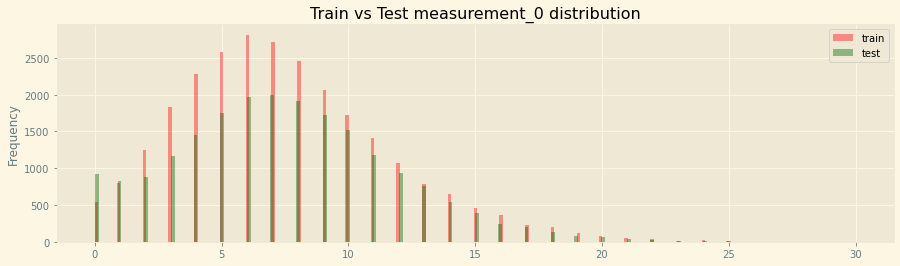

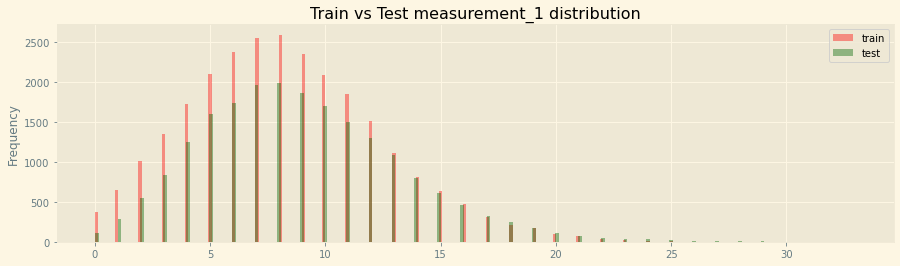

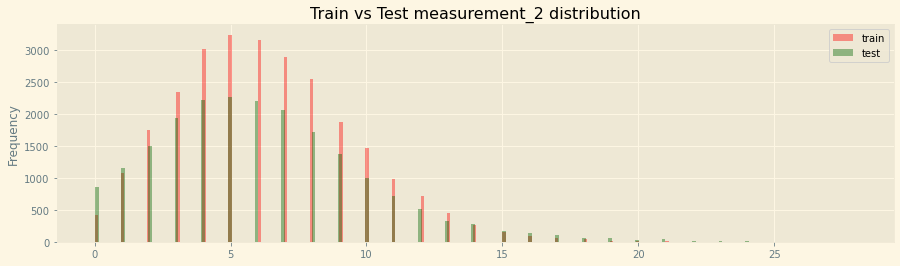

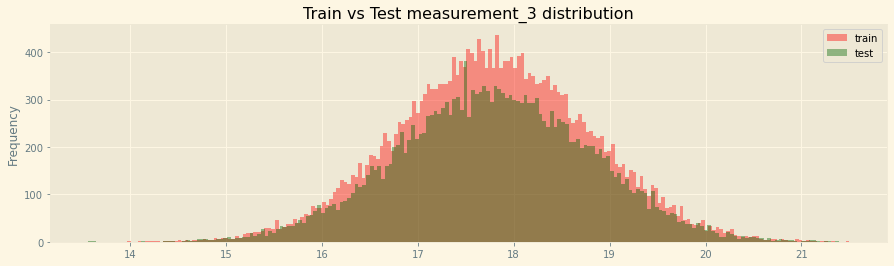

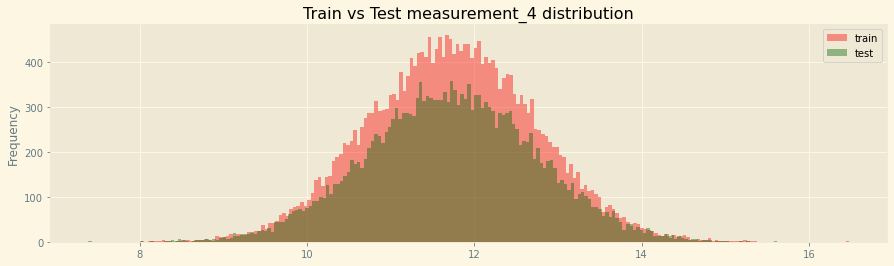

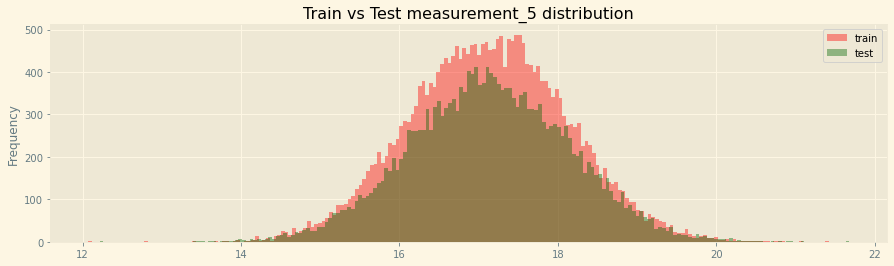

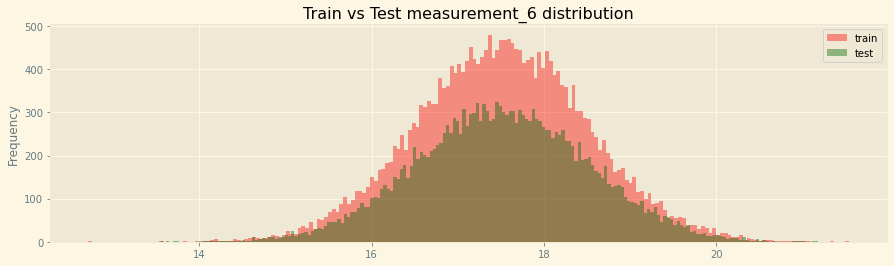

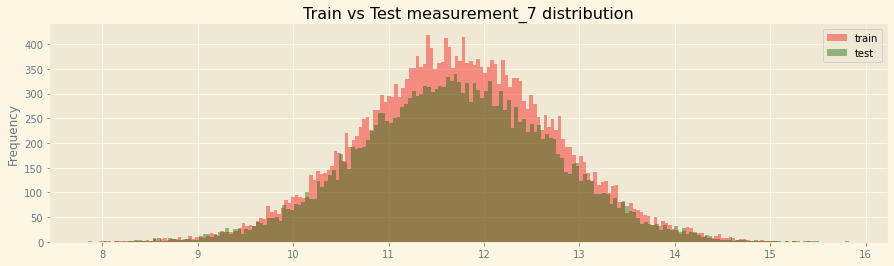

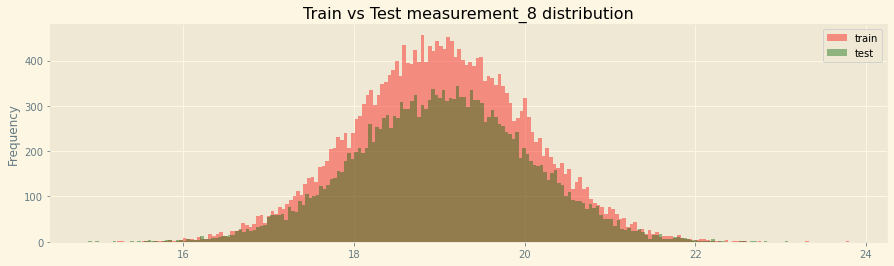

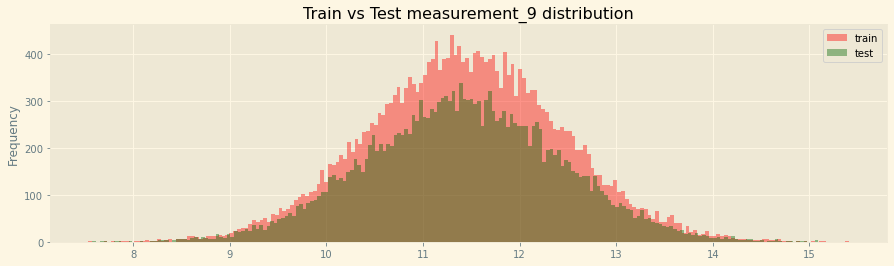

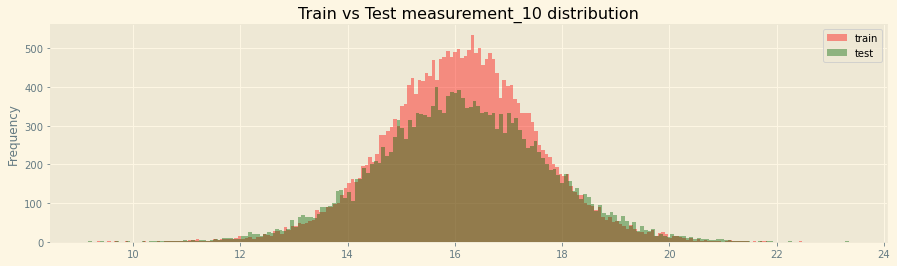

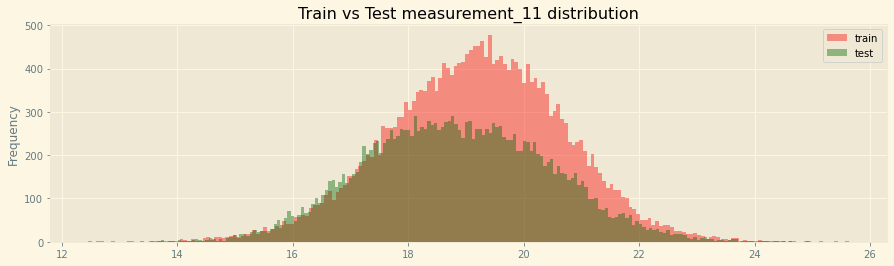

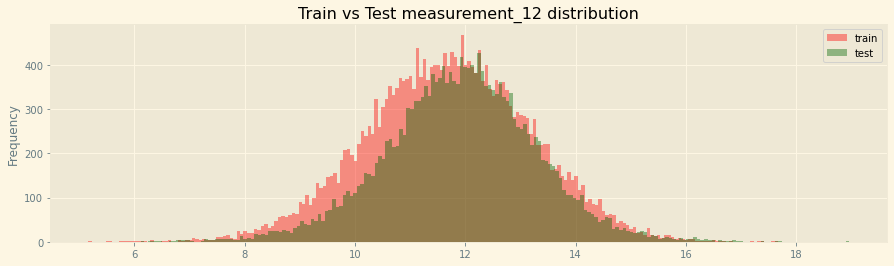

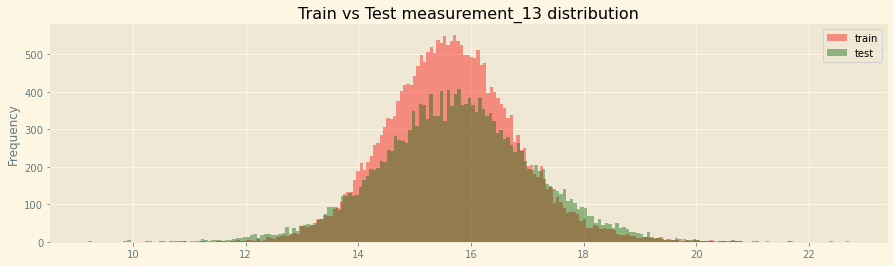

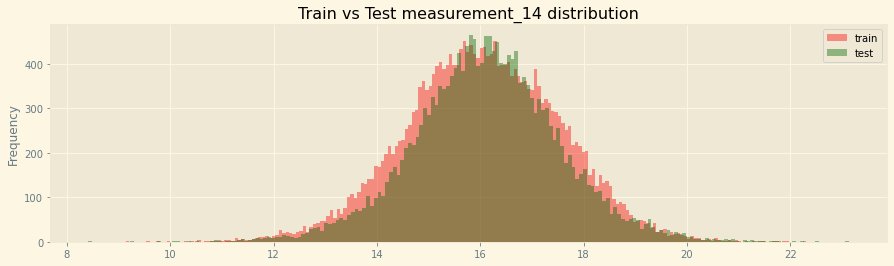

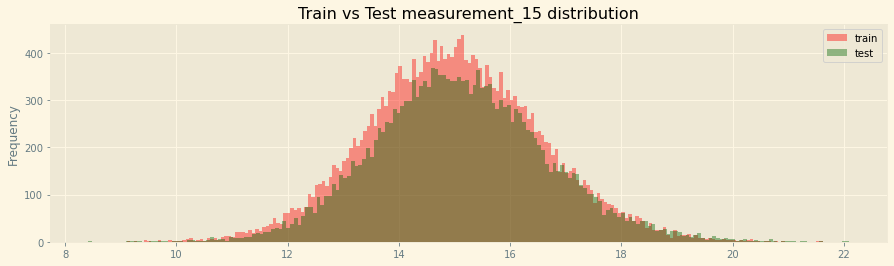

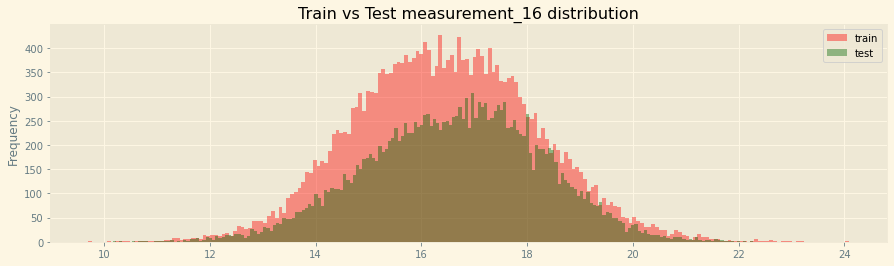

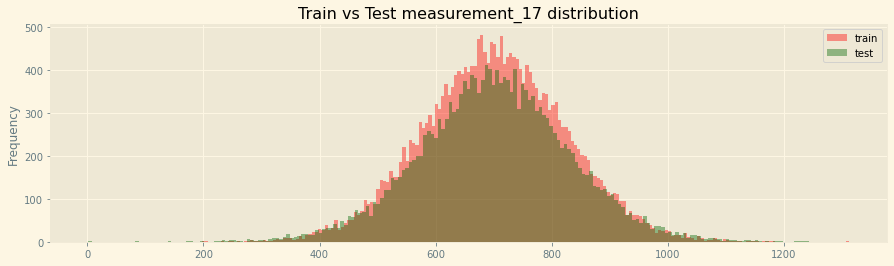

In [28]:
for name in num_features:
    viz.plot_hist_train_test_overlapping(train_df, test_df, name, figsize=(15, 4), bins=200)

## Boxplots of all the features

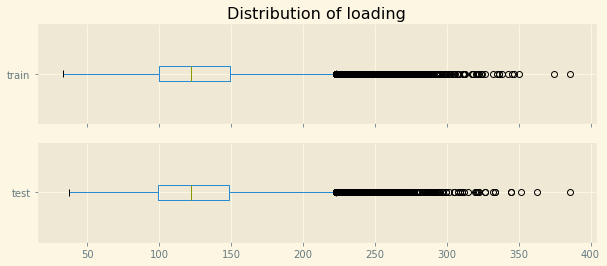

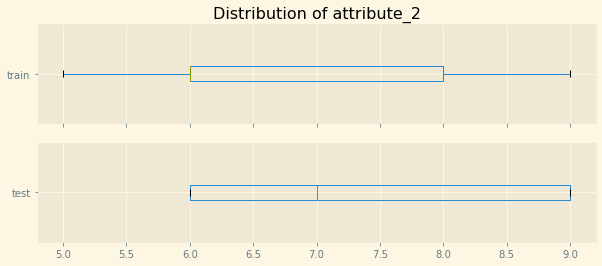

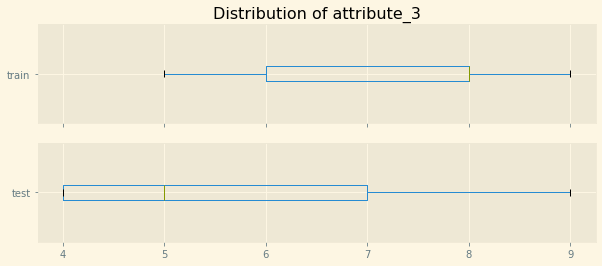

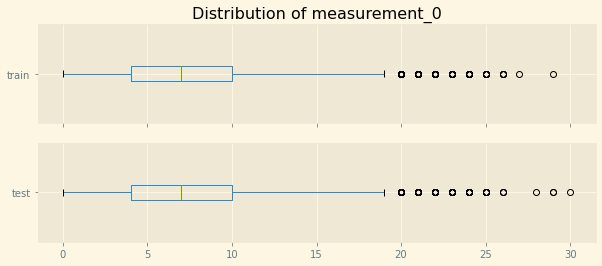

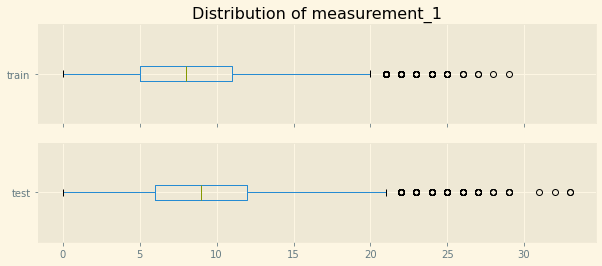

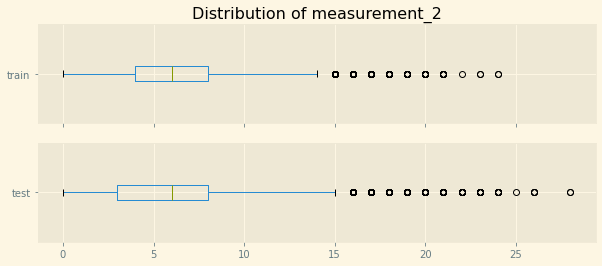

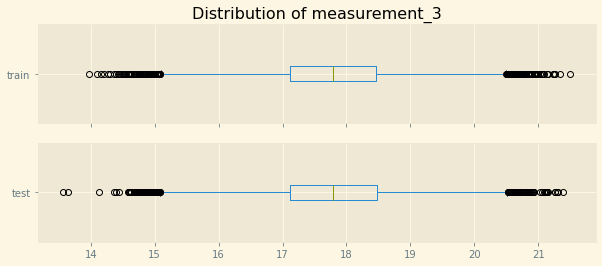

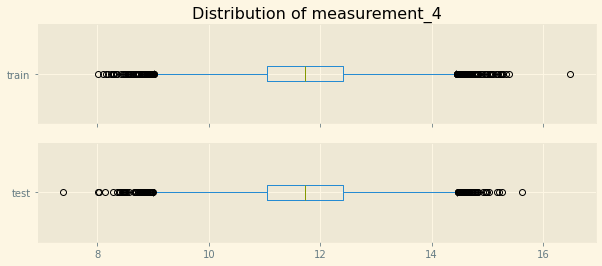

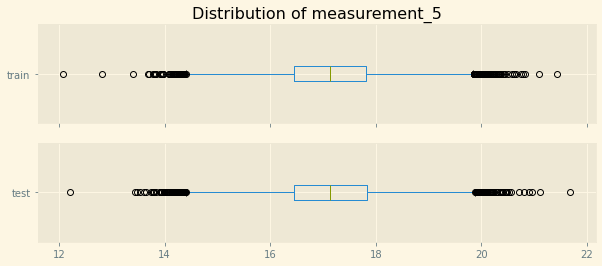

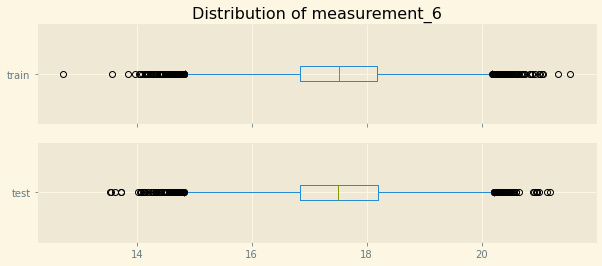

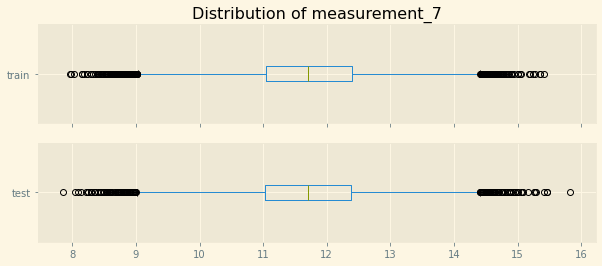

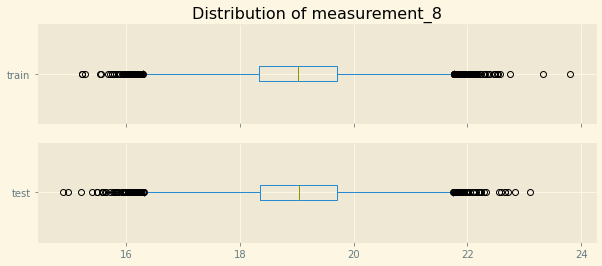

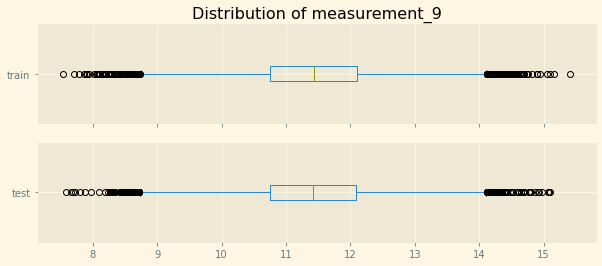

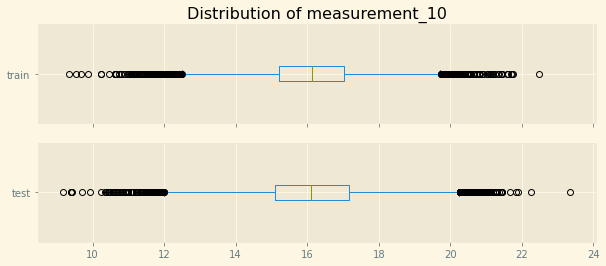

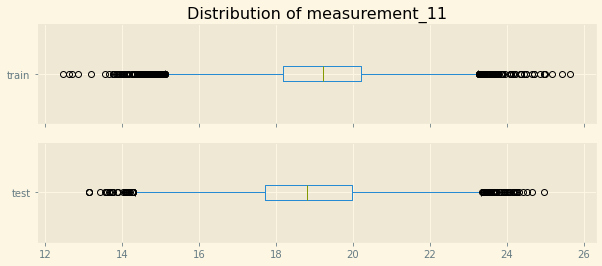

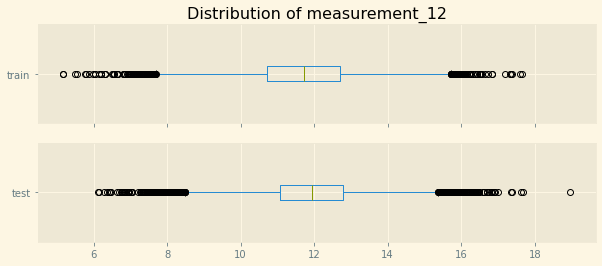

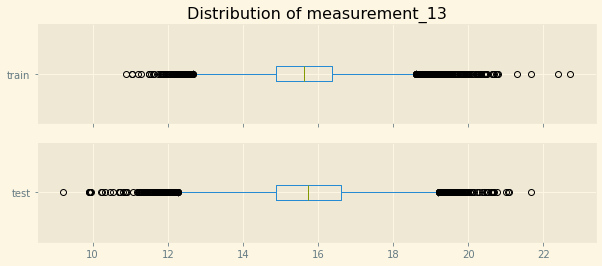

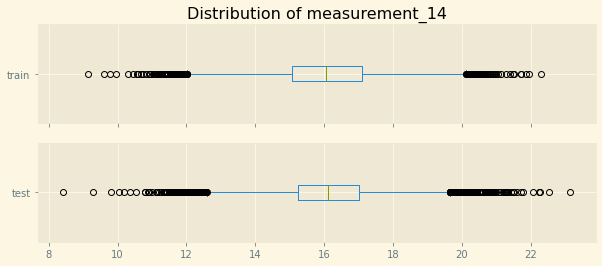

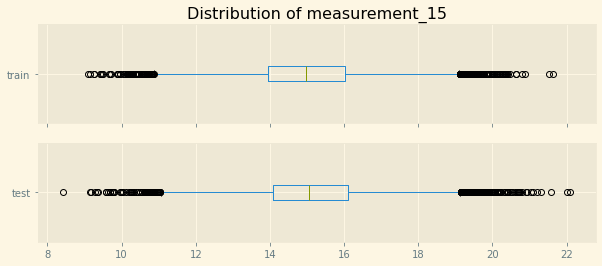

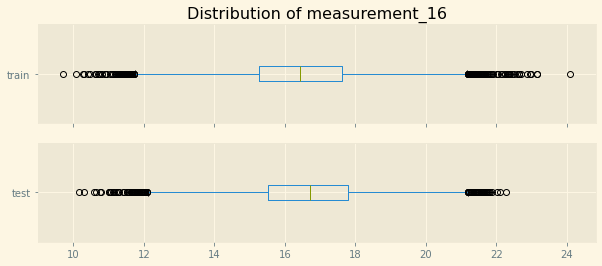

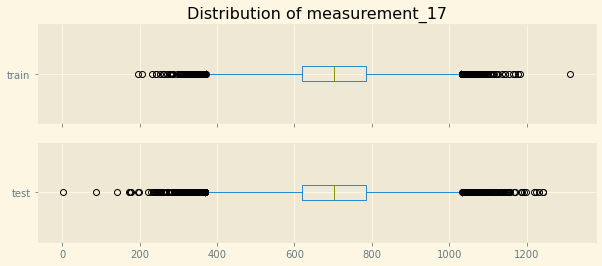

In [29]:
for name in num_features:
    viz.plot_boxh_train_test_overlapping(train_df=train_df, test_df=test_df, feature_name=name)

## Check the skewness of the data

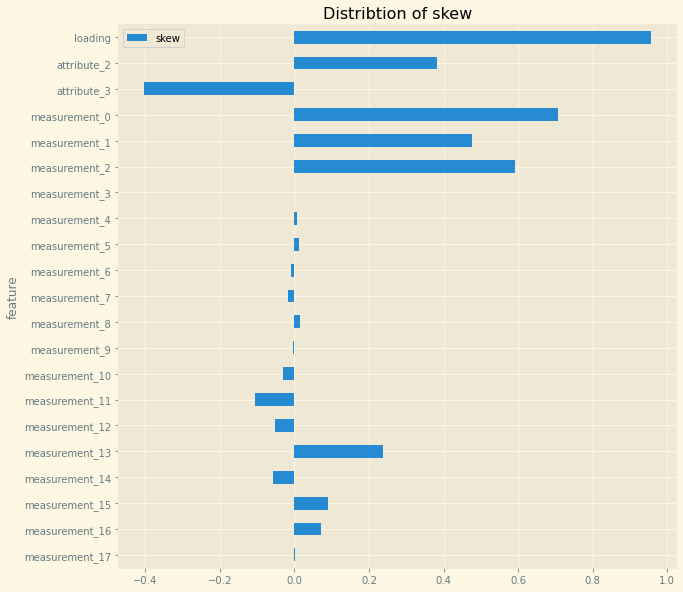

In [32]:
df_skew = pd.DataFrame(train_df[num_features].skew())
df_skew = df_skew.reset_index()
df_skew.columns = ["feature", "skew"]

viz.plot_vanilla_barh(df=df_skew, index_name="feature", feature_name="skew", figsize=(10, 10))

## Check the mean value of every feature

In [33]:
df_mean = pd.DataFrame(train_df[num_features].mean())
df_mean = df_mean.reset_index()
df_mean.columns = ["feature", "mean"]
df_mean = df_mean.sort_values(by="mean", ascending=False)

with pd.option_context("display.float_format", '{:.2f}'.format):
    print(df_mean)

           feature   mean
20  measurement_17 701.27
0          loading 127.83
14  measurement_11  19.17
11   measurement_8  19.02
6    measurement_3  17.79
9    measurement_6  17.51
8    measurement_5  17.13
19  measurement_16  16.46
13  measurement_10  16.12
17  measurement_14  16.05
16  measurement_13  15.65
18  measurement_15  15.00
7    measurement_4  11.73
10   measurement_7  11.72
15  measurement_12  11.70
12   measurement_9  11.43
4    measurement_1   8.23
3    measurement_0   7.42
2      attribute_3   7.24
1      attribute_2   6.75
5    measurement_2   6.26


### Check distribution of all the features in the same scale

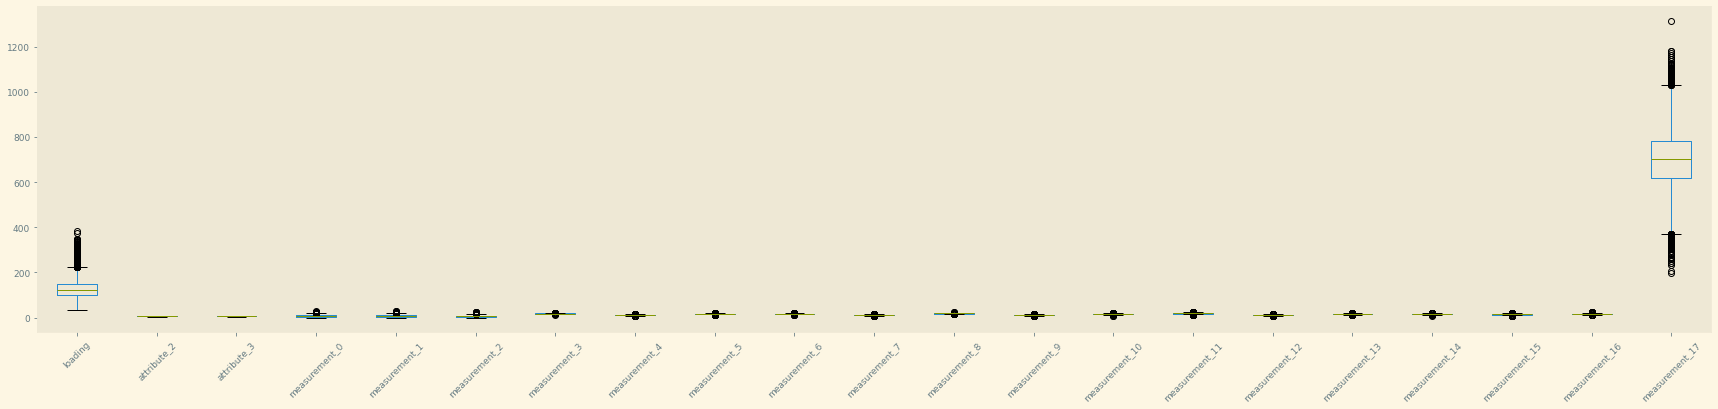

In [35]:
train_df[num_features].boxplot(grid=False, rot=45, fontsize=9, figsize=(30, 6));

Looks like measurement_17 has a altogether different scale. Let's drop it

<AxesSubplot:>

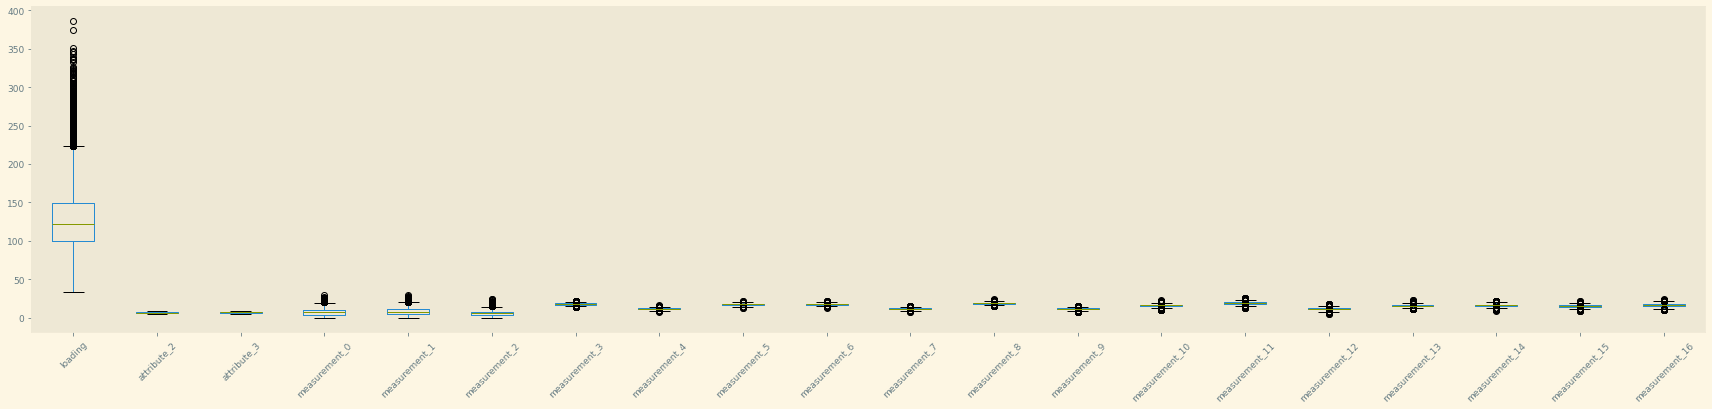

In [36]:
mod_features = [name for name in features if "measurement_17" not in name]

train_df[mod_features].boxplot(grid=False, rot=45, fontsize=9, figsize=(30, 6))

## Is there any column in float which is actually integer?

In [38]:
process_data.check_if_floats_are_int(combined_df[num_features])

Feature loading have decimals
Feature attribute_2 does not have any decimals
Feature attribute_3 does not have any decimals
Feature measurement_0 does not have any decimals
Feature measurement_1 does not have any decimals
Feature measurement_2 does not have any decimals
Feature measurement_3 have decimals
Feature measurement_4 have decimals
Feature measurement_5 have decimals
Feature measurement_6 have decimals
Feature measurement_7 have decimals
Feature measurement_8 have decimals
Feature measurement_9 have decimals
Feature measurement_10 have decimals
Feature measurement_11 have decimals
Feature measurement_12 have decimals
Feature measurement_13 have decimals
Feature measurement_14 have decimals
Feature measurement_15 have decimals
Feature measurement_16 have decimals
Feature measurement_17 have decimals


['attribute_2',
 'attribute_3',
 'measurement_0',
 'measurement_1',
 'measurement_2']

## Feature wise: time series?

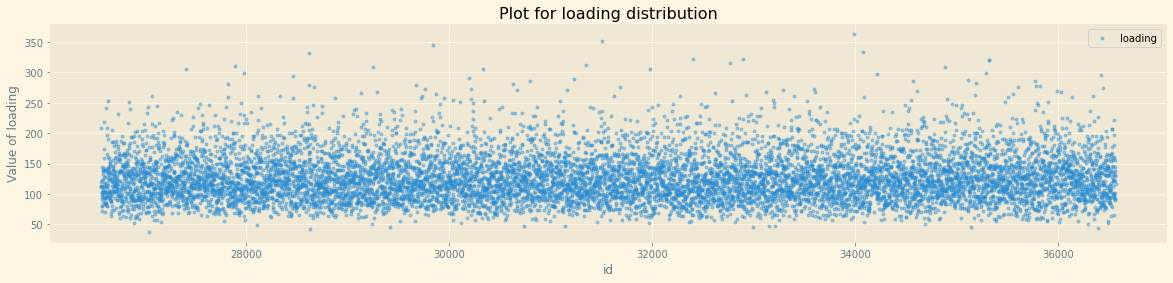

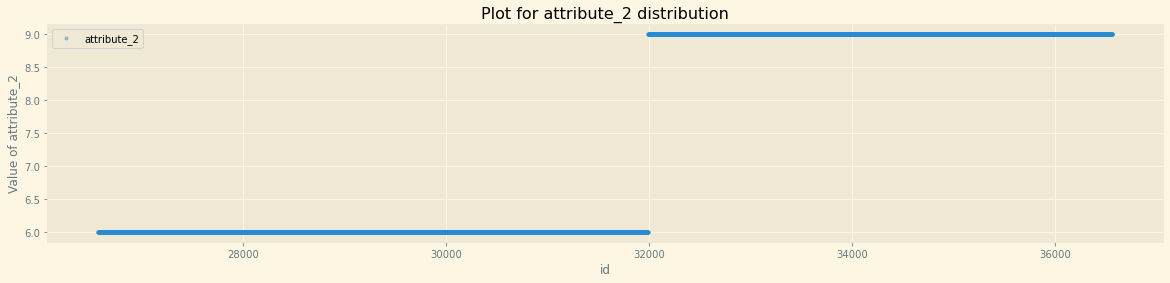

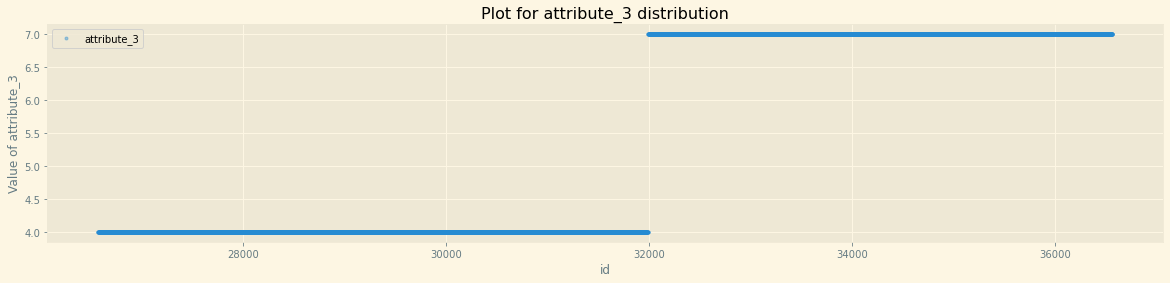

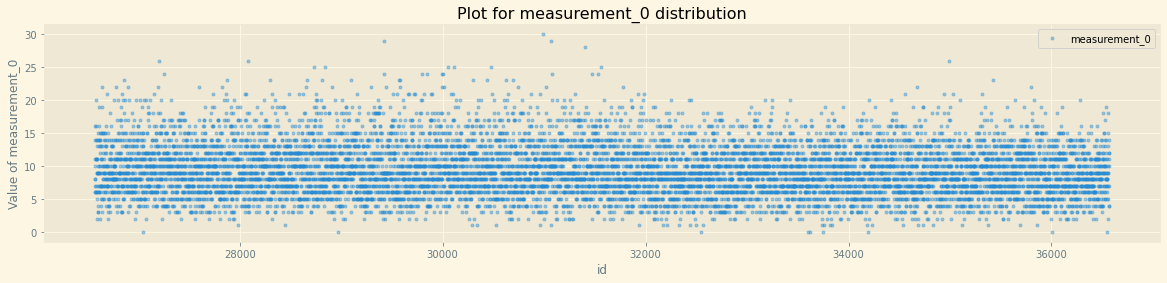

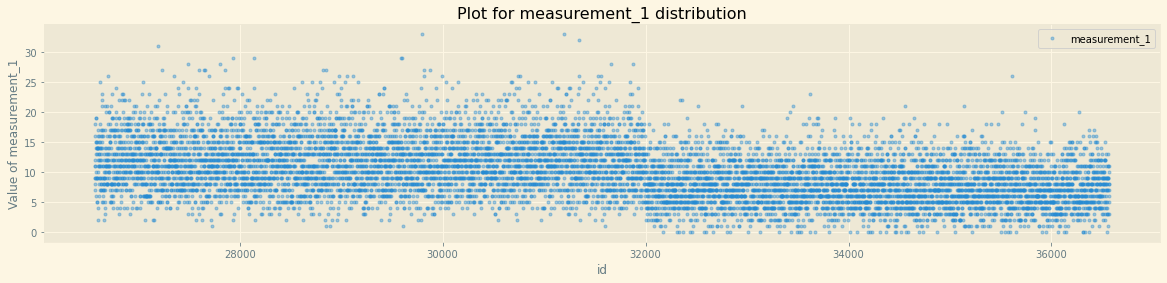

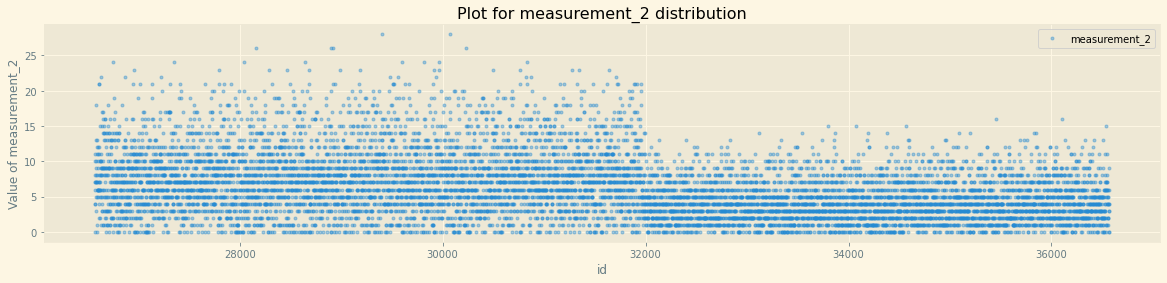

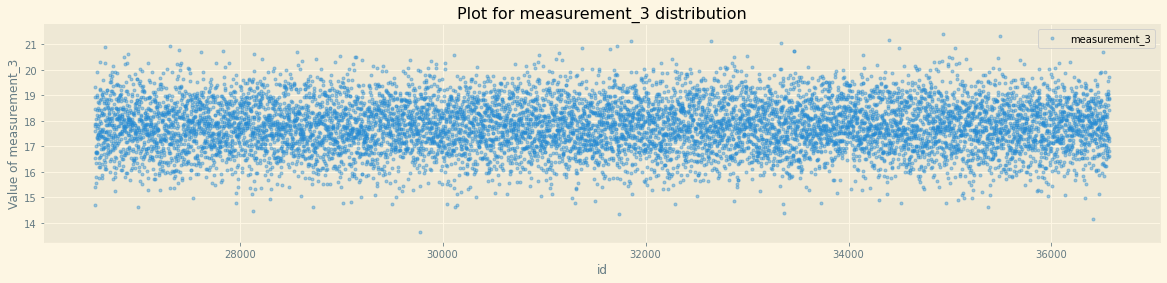

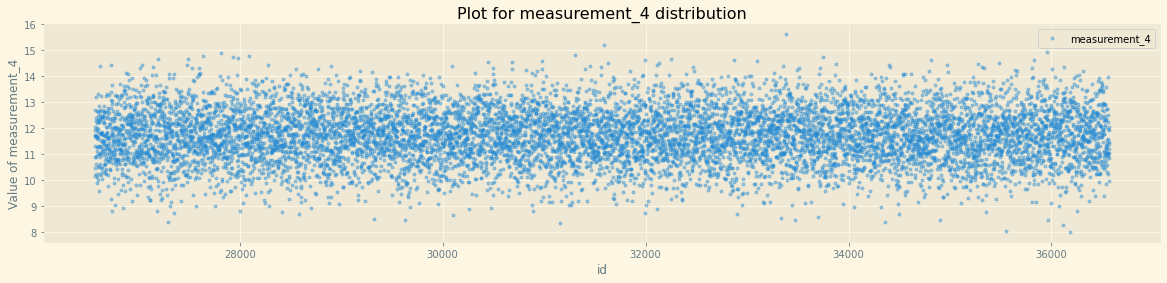

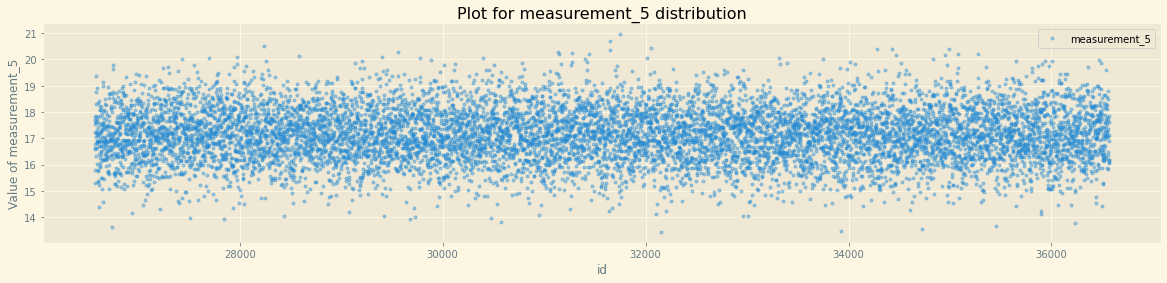

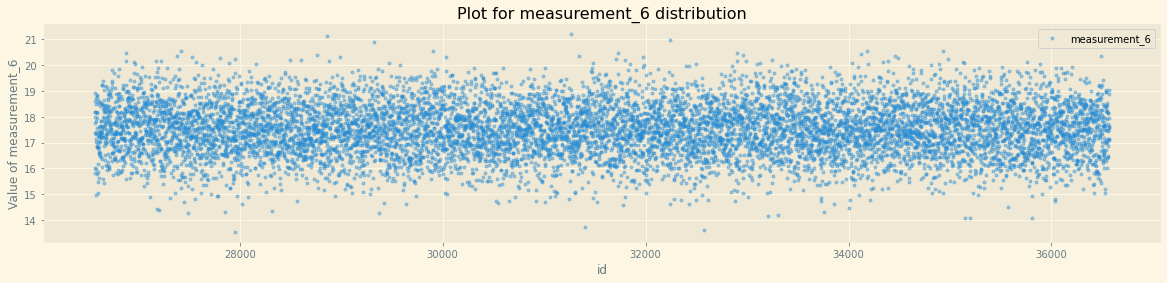

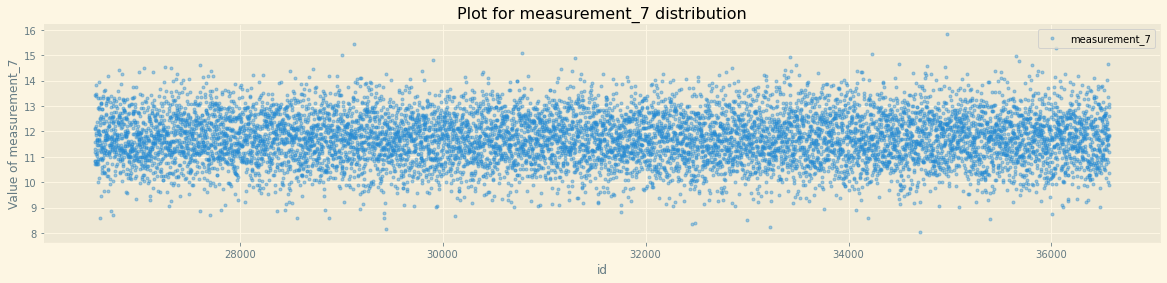

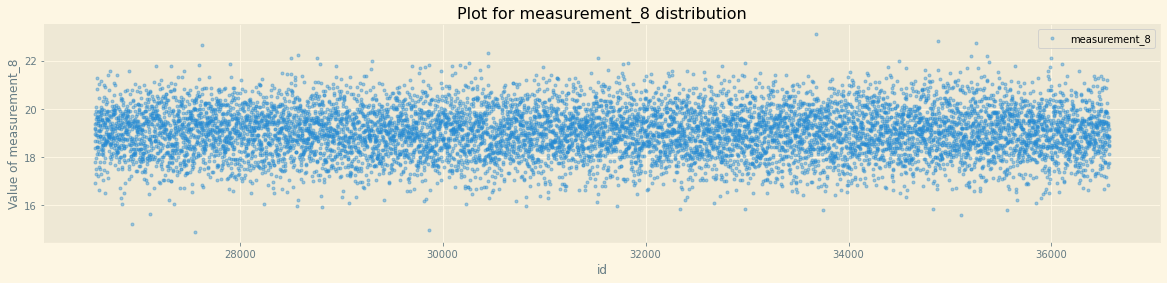

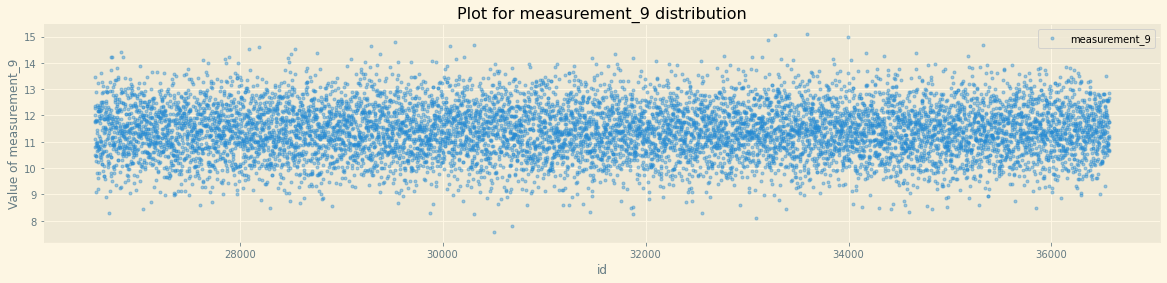

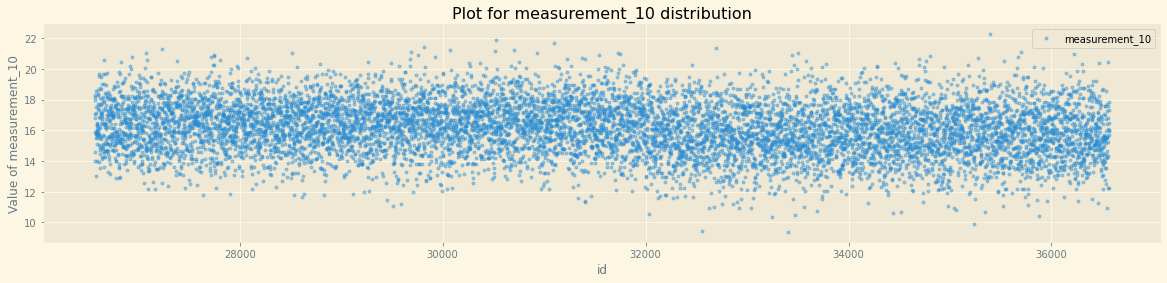

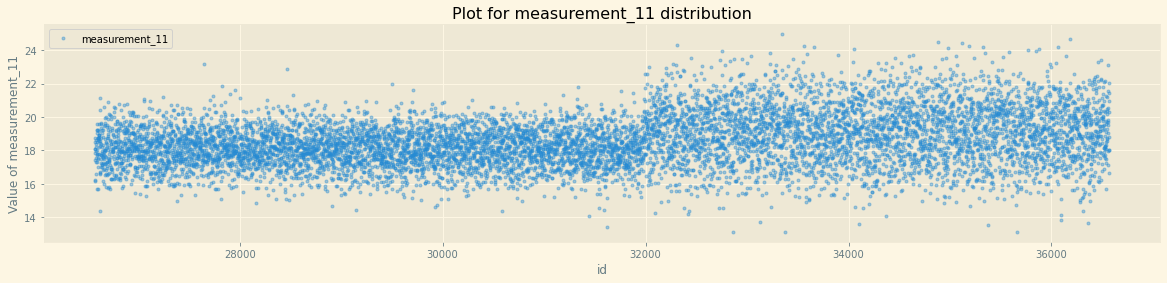

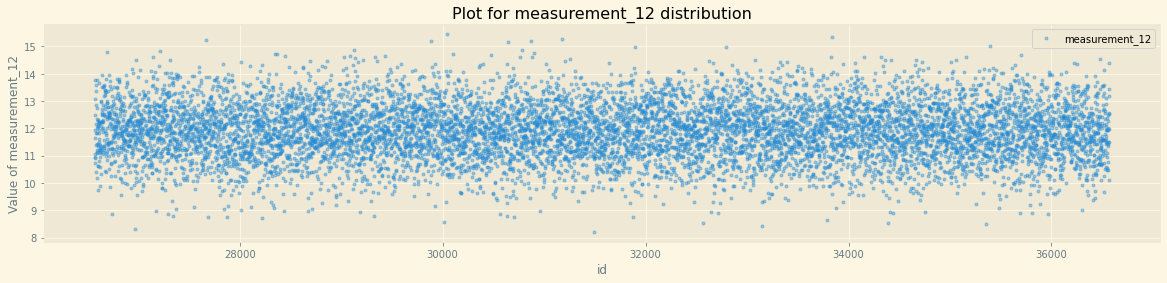

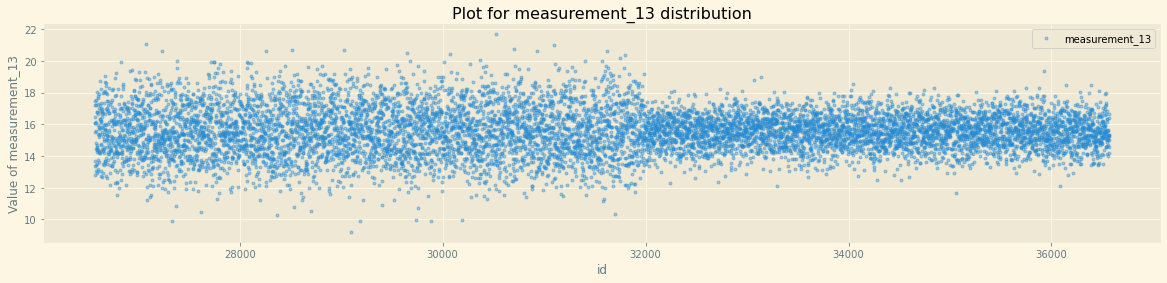

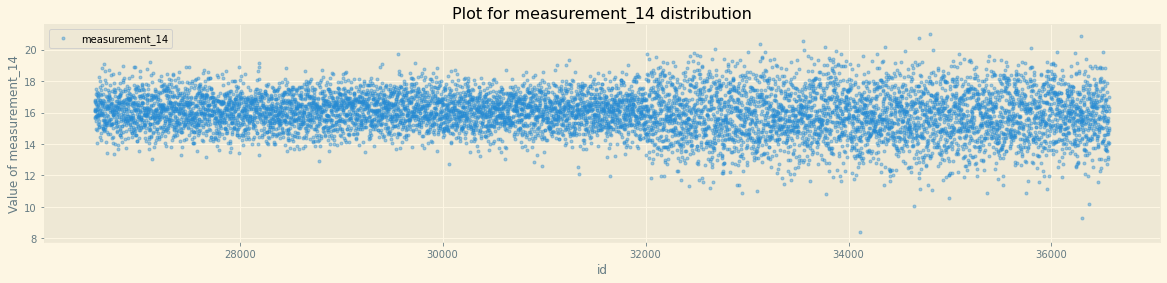

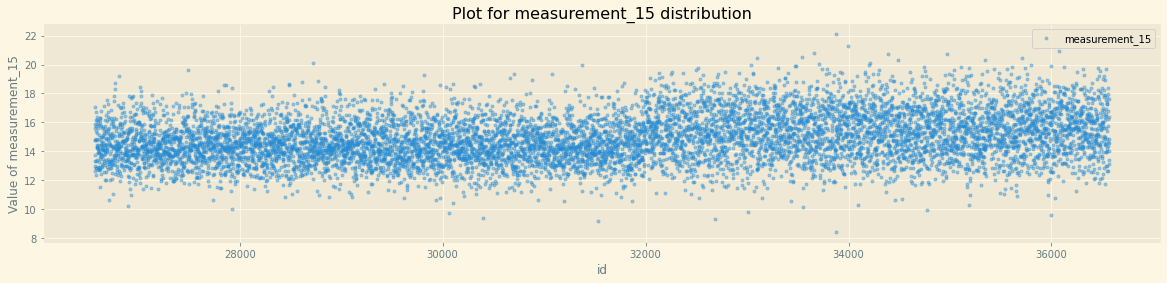

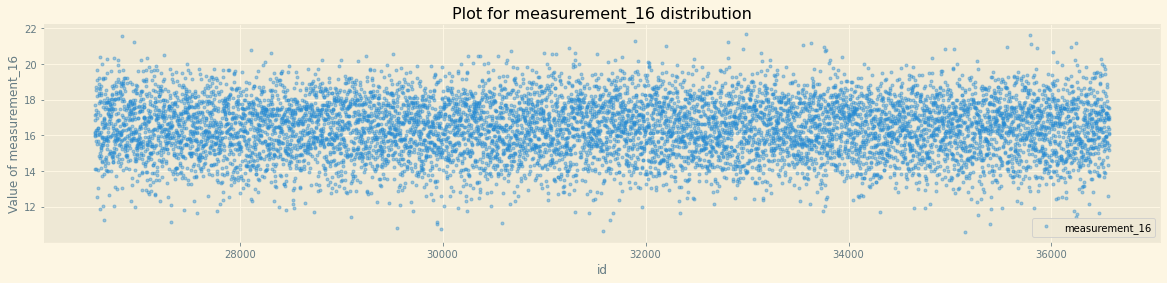

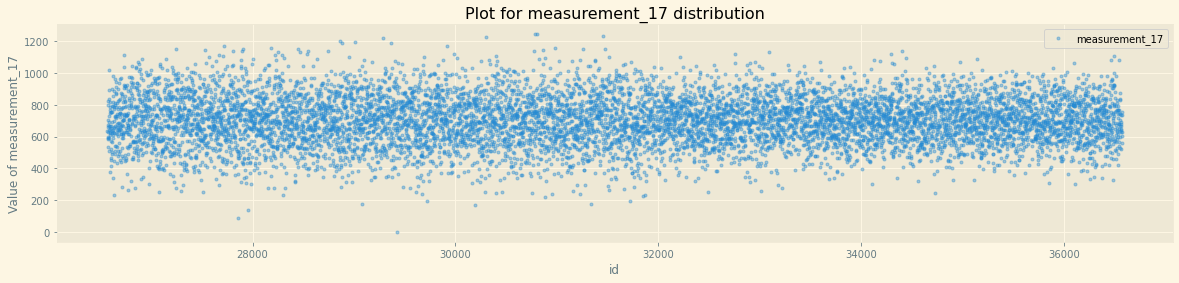

In [40]:
for name in num_features:
    viz.plot_point(test_df[0:10000], feature_name=name, figsize=(20, 4))

## Row wise: Time Series?

In [41]:
combined_df_min_max = combined_df.copy()
for name in num_features:
    mm = MinMaxScaler()
    combined_df_min_max.loc[:, name] = mm.fit_transform(combined_df[[name]])

#### Original Data after min max scaling (row wise)

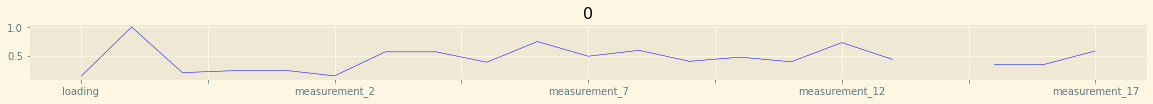

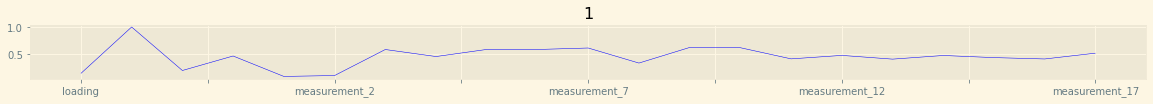

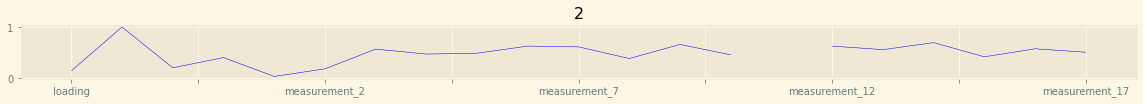

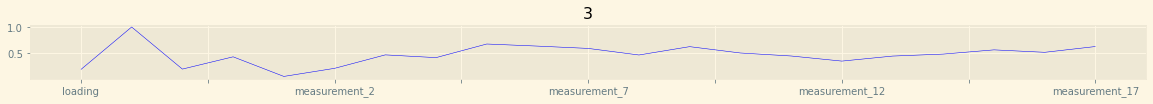

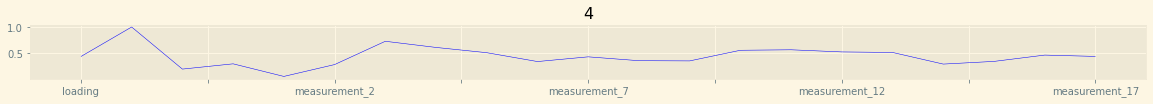

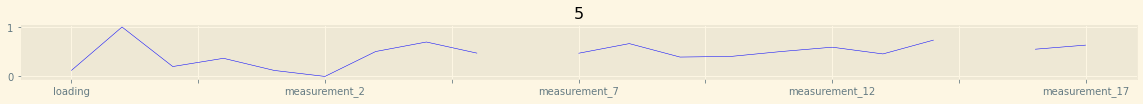

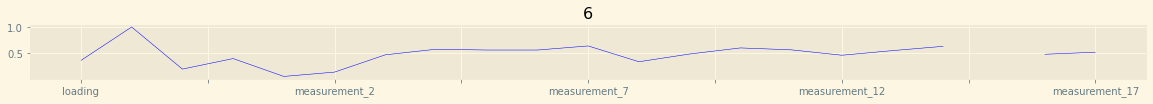

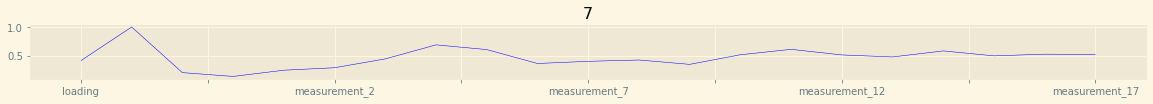

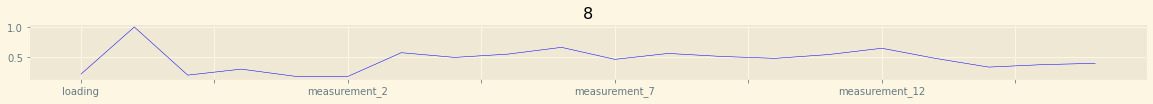

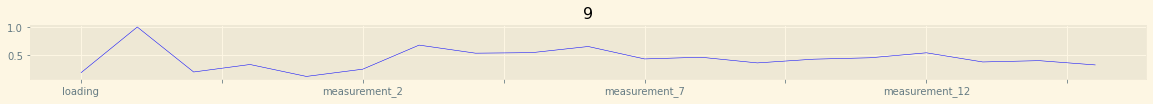

In [43]:
for k in range(0, 10):
    pd.Series(combined_df_min_max[num_features].iloc[k]).plot(figsize=(20, 1), title=f"{str(k)}", color="blue", linewidth=0.5)
    plt.show()